# Profiles

In [1]:
import numpy as np
import pynbody
import matplotlib.pylab as plt
%matplotlib inline
from snap_io import load_moria_sim_and_kicked, load_moria, load_kicked, load_snap

In [2]:
SIM_NUMBER = 71002
snap = -1

In [3]:
moria_sim_snap = load_moria(SIM_NUMBER, snap)
kicked_sim_snap = load_kicked(SIM_NUMBER, snap)

In [4]:
h1 = moria_sim_snap
c = pynbody.analysis.halo.center(h1, retcen=True)
print("Recentering into: kpc", c)
pynbody.analysis.halo.center(h1)
# print(c)
# h1.properties['eps'] = pynbody.units.Unit("1.1 kpc")
my_eps_value = 0.1
# Beware of the dtype of the SimArray (if something goes wrong remember to "del h1['eps']")
h1['eps'] = pynbody.array.SimArray(np.ones(len(h1['pos'])), "kpc", dtype=np.float32) * my_eps_value
print(h1['eps'])
pd = pynbody.analysis.profile.Profile(h1.d, max=50, type = 'log')
ps = pynbody.analysis.profile.Profile(h1.s, max=50, type = 'log')
pg = pynbody.analysis.profile.Profile(h1.g, max=50, type = 'log')
ptot = pynbody.analysis.profile.Profile(h1, min=.01,max=50, type = 'log')
prof_list = [ptot,pd,ps,pg]

Recentering into: kpc [-19.68741208  -1.1828672   -1.81357363]
[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]


In [5]:
h2 = kicked_sim_snap
c = pynbody.analysis.halo.center(h2, retcen=True)
print("Recentering into: kpc", c)
pynbody.analysis.halo.center(h2)
# print(c)
# h1.properties['eps'] = pynbody.units.Unit("1.1 kpc")
my_eps_value = 0.1
# Beware of the dtype of the SimArray (if something goes wrong remember to "del h1['eps']")
h2['eps'] = pynbody.array.SimArray(np.ones(len(h2['pos'])), "kpc", dtype=np.float32) * my_eps_value
print(h2['eps'])
pd_k = pynbody.analysis.profile.Profile(h2.d, max=50, type = 'log')
ps_k = pynbody.analysis.profile.Profile(h2.s, max=50, type = 'log')
pg_k = pynbody.analysis.profile.Profile(h2.g, max=50, type = 'log')
ptot_k = pynbody.analysis.profile.Profile(h2, min=.01,max=50, type = 'log')
prof_list_k = [ptot_k,pd_k,ps_k,pg_k]

Recentering into: kpc [ 195.52536303 -173.37193762   -4.82092497]
[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]


Common settings

In [6]:
kicked_sim_snap.properties['time'].in_units("Gyr")

13.11397991328508

In [7]:
# titles = ('MoRIA sim{} - time: {time:.2fi}', 'Kicked sim{} - time {time}'.format(time=moria_sim_snap.time))

### Circular velocity

In [8]:
titles = ('MoRIA sim{} - time: {}', 'Kicked sim{} - time {}')

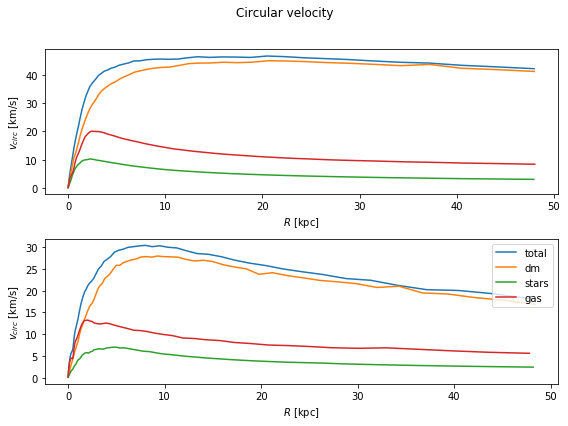

In [14]:
fig, axes = plt.subplots(2, figsize=(8,6))
fig.suptitle("Circular velocity")

for ax, title, p, in zip(axes, titles, (prof_list, prof_list_k)):
    for prof, name in zip(p,['total','dm','stars','gas']):
        ax.plot(prof['rbins'], prof['v_circ'], label=name)
#         ax.set_title(title.format(SIM_NUMBER))
        ax.set_xlabel('$R$ [kpc]');
        ax.set_ylabel('$v_{circ}$ [km/s]');
plt.legend(loc='upper right');
plt.tight_layout()
fig.subplots_adjust(top=0.88)

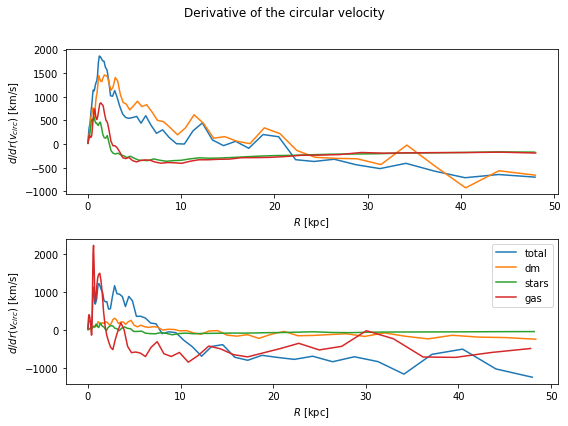

In [10]:
fig, axes = plt.subplots(2, figsize=(8,6))
fig.suptitle("Derivative of the circular velocity")

for ax, title, p, in zip(axes, titles, (prof_list, prof_list_k)):
    for prof, name in zip(p,['total','dm','stars','gas']):
        ax.plot(prof['rbins'], prof['d_v_circ'], label=name)
#         ax.set_title(title.format(SIM_NUMBER))
        ax.set_xlabel('$R$ [kpc]');
        ax.set_ylabel('$d/dr(v_{circ})$ [km/s]');
plt.legend(loc='upper right');
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [11]:
### Rotation Curve Spherical ?


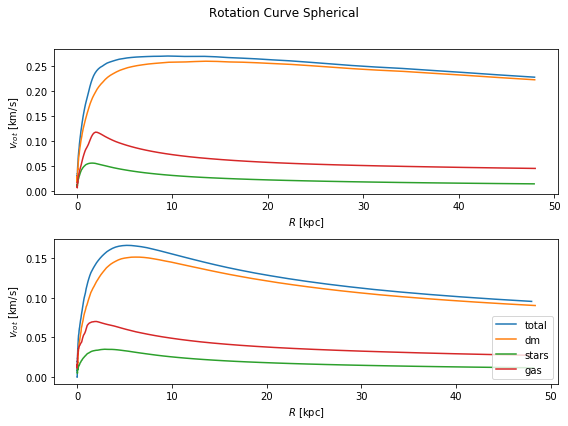

In [15]:
fig, axes = plt.subplots(2, figsize=(8,6))
fig.suptitle("Rotation Curve Spherical")

for ax, title, p, in zip(axes, titles, (prof_list, prof_list_k)):
    for prof, name in zip(p, ['total','dm','stars','gas']):
        ax.plot(prof['rbins'], prof['rotation_curve_spherical'], label=name)
#         ax.set_title(title.format(SIM_NUMBER))
        ax.set_xlabel('$R$ [kpc]');
        ax.set_ylabel('$v_{rot}$ [km/s]');
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [ ]:
h1['mass'].dtype, h1['pos'].dtype

### Velocity dispersion of stars

In [ ]:
h1.properties['boxsize'] = pynbody.units.Unit('10 Mpc')
h1.properties

In [ ]:
h2.properties['boxsize'] = pynbody.units.Unit('10 Mpc')
h2.properties

In [ ]:
fig, axes = plt.subplots(2, figsize=(8,6))
for ax, title, p, in zip(axes, titles, (ps, ps_k)):
    ax.plot(p['rbins'], p['v_disp'])
#     ax.set_title(title.format(SIM_NUMBER))
    ax.set_xlabel('$R$ [kpc]');
    ax.set_ylabel('$\sigma*$ [km/s]')
fig.suptitle("Velocity dispersion of stars")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
# plt.xlabel('$R$ [kpc]', fontsize='x-large');
# plt.ylabel('$v_{\star}^{disp}$ [km/s]', fontsize='x-large');

In [ ]:
fig, axes = plt.subplots(2, figsize=(8,6))
#reprofile a few of h-l radii
for ax, title, p, in zip(axes, titles, (ps, ps_k)):
    ax.plot(p['rbins'], p['v_disp'])
    ax.set_title(title.format(SIM_NUMBER))
    ax.set_xlabel('$R$ [kpc]', fontsize='x-large');
    ax.set_ylabel('$v_{\star}^{disp}$ [km/s]', fontsize='x-large');
# plt.xlabel('$R$ [kpc]', fontsize='x-large');
# plt.ylabel('$v_{\star}^{disp}$ [km/s]', fontsize='x-large');
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# for prof, name in zip([p,pd,ps,pg],['total','dm','stars','gas']) : ax.plot(prof['rbins'], prof['rotation_curve_spherical'], label=name)
# plt.legend();

In [ ]:
# f1 = figure(width=400, height=400, title='Center of gravity position', x_axis_label="x (kpc)", y_axis_label="y (kpc)")
# f1.line(x_cog, y_cog)
# f1.circle(0,0, radius=virial_radius.value, alpha=0.1)
# f2 = figure(width=400, height=400, x_axis_label="Time (Gyr)", y_axis_label="SFR (Msol/yr)")
# # f2.line(t[:-1], sfr)
# f2.vbar(x=t[:-1], top=sfr, width=None)
# p = row([f1, f2])
# show(p)